In this notebook we segment the region based on topography and then consider the ensemble variability in averages of different properties across the region.

there are two many pixels to take the ensemble variance between these. Therefore we divide the regions into superpixels based on the topograhy and consider the average values witin these superpixels. The average will then be different for each ensemble member.

In [1]:
#import modules:
import mogreps
import netCDF4
import numpy as np
from pathlib import Path
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import iris

#(module for transforming coordinate systems)
import cartopy.crs as ccrs

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)

Load in the surface topography image.

In [2]:
# load the image and convert it to a floating point data type
#image = img_as_float(io.imread('airtemp2.png'))
image = img_as_float(io.imread('surface_altitude.png'))
image=image[:,:,0:3]

In [3]:

f = mogreps.download_data(
    'mogreps-uk',
    mogreps.make_data_object_name('mogreps-uk', 2013, 1, 1, 3, 0, 3),
    data_folder=mogreps.Path('.'))
    # dataset_name, year, month, day, hour, realization, forecast_period

In [4]:
data_set = netCDF4.Dataset(f)
data_set.variables['surface_altitude'].shape
image = data_set.variables['surface_altitude']
image = np.zeros((548,421,3))
image[:,:,0] = np.array(data_set.variables['surface_altitude'])
image[:,:,1] = np.array(data_set.variables['surface_altitude'])
image[:,:,2] = np.array(data_set.variables['surface_altitude'])
scale = np.max(np.abs(image))
image = image/scale

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


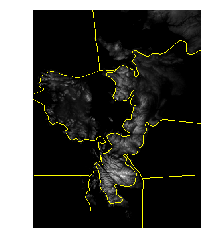

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [7 7 7 ... 8 8 8]
 [7 7 7 ... 8 8 8]
 [7 7 7 ... 8 8 8]]


In [5]:
#choose number of segments:
numSegments = 10

# apply SLIC and extract (approximately) the supplied number
# of segments
segments = slic(image, n_segments = numSegments, sigma = 5)

# show the output of SLIC
fig = plt.figure("Superpixels -- %d segments" % (numSegments))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")

# show the plots
plt.show()

print(segments)

name = prods_op_mogreps-uk_20130201_03_00_003.nc
Pixel = 0
Pixel = 1
Pixel = 2
Pixel = 3
Pixel = 4
Pixel = 5
Pixel = 6
Pixel = 7


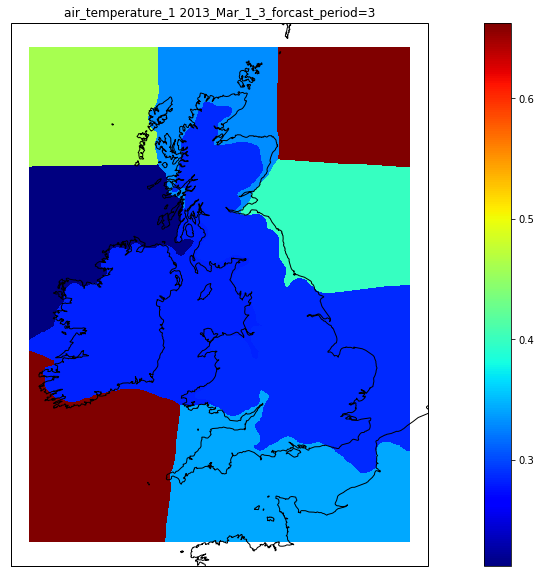

Pixel = 0
Pixel = 1
Pixel = 2
Pixel = 3
Pixel = 4
Pixel = 5
Pixel = 6
Pixel = 7


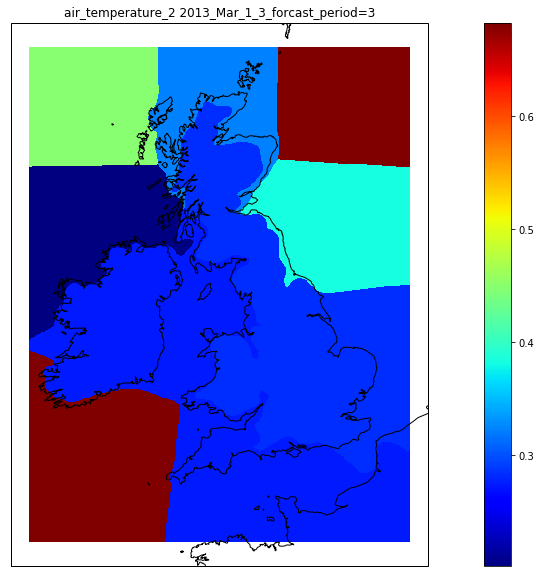

Pixel = 0
Pixel = 1
Pixel = 2
Pixel = 3
Pixel = 4
Pixel = 5
Pixel = 6
Pixel = 7


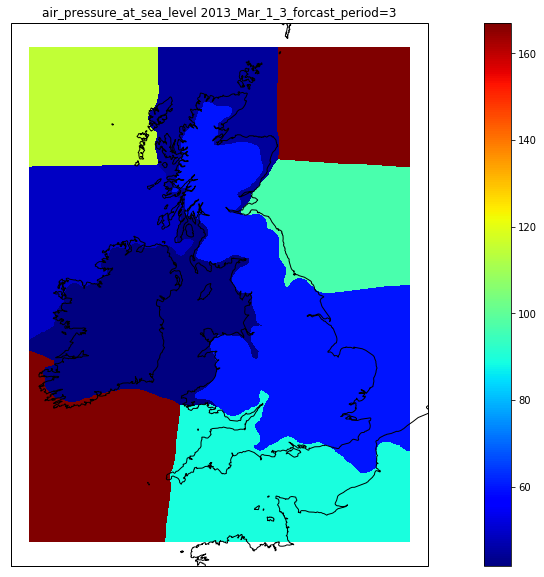

Pixel = 0
Pixel = 1
Pixel = 2
Pixel = 3
Pixel = 4
Pixel = 5
Pixel = 6
Pixel = 7


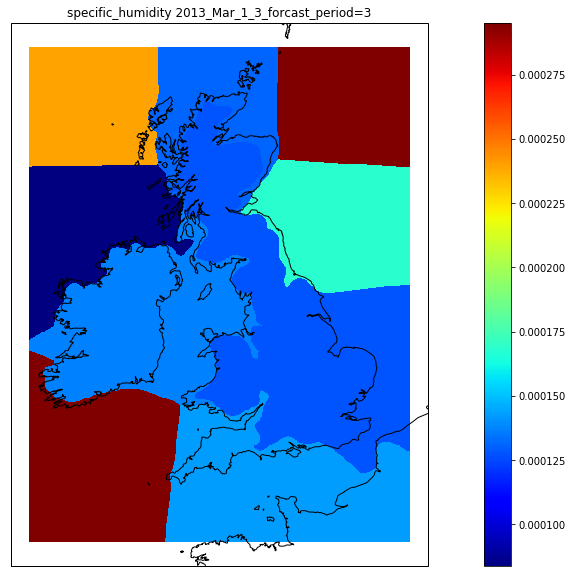

Pixel = 0
Pixel = 1
Pixel = 2
Pixel = 3
Pixel = 4
Pixel = 5
Pixel = 6
Pixel = 7


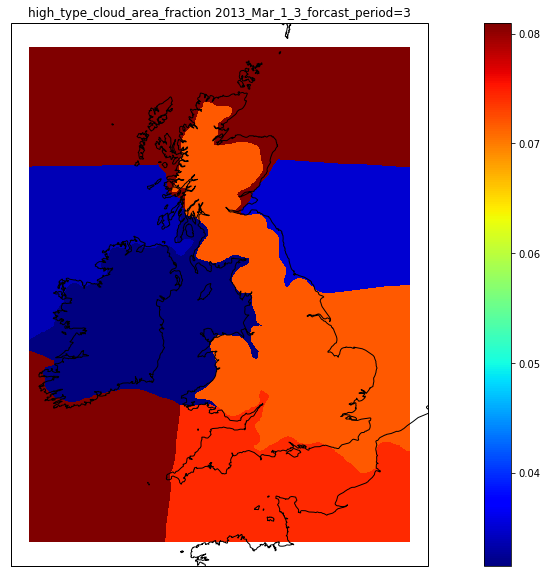

In [7]:
#to add: date and time values for the image. 

#original file that worked: 2013,2,1,3,0,3
name = mogreps.make_data_object_name(
        'mogreps-uk',
        2013, 2, 1, 3,
        0, 3)
print("name = " + name )
year = 2013
month= "Mar"
day = 1
hour = 3
forecast_period = 3

import ukms_project.superpixel_variance_computations as SUPER_PIXELSSSS

Var_Names = [ 'air_temperature_1', 'air_temperature_2', 'air_pressure_at_sea_level','specific_humidity','high_type_cloud_area_fraction']

for k in Var_Names : 
    STD_Vals ,Variance_Vals  = SUPER_PIXELSSSS.Get_Super_Pixel_STDs(k,segments,year,month,day,hour,forecast_period)
    All_STD_Vals = SUPER_PIXELSSSS.Put_into_segmentation_matrix(segments,STD_Vals)
    SUPER_PIXELSSSS.Plot_on_Segments(All_STD_Vals,k,year,month,day,hour,forecast_period,filename='STD_Plot_' + k)

Once the superpixels are identified we need to loop over the different ensembles. For each superpixel we find the varage value of the variable of interest and then look at the variance in this across the different ensemble members.

Colour plot of the segments:

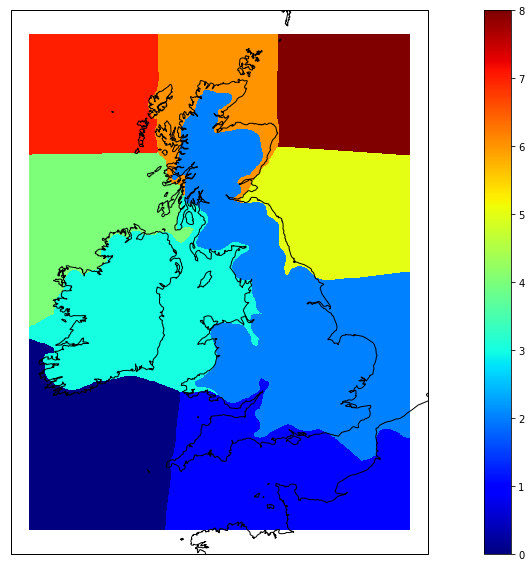

In [7]:
   
#print(segments)

rotation = data_set['rotated_latitude_longitude']
transform=ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude,pole_latitude=rotation.grid_north_pole_latitude)
projection = transform

fig = plt.figure(figsize=(20,10))
#create an axis instance:
ax = fig.add_subplot(111,projection=projection)
pcm = ax.pcolormesh(data_set['grid_longitude'],data_set['grid_latitude'],segments,transform=transform,cmap='jet')
ax.coastlines(resolution='10m')
#ax.colorbar()
colbar = fig.colorbar(pcm)
#ax.imshow(mark_boundaries(image, segments))
#colbar.set_label("VAR("  + str(variable_name) + ")")

#plt.savefig("Var_in" + str(variable_name) + " (Kelvin)", bbox_inches='tight' ) 
plt.show()

Colour plot of the standard deviations:

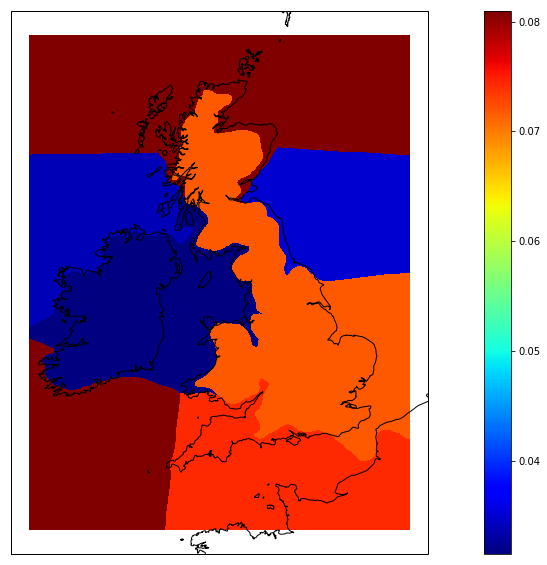

In [8]:
rotation = data_set['rotated_latitude_longitude']
transform=ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude,pole_latitude=rotation.grid_north_pole_latitude)
projection = transform

fig = plt.figure(figsize=(20,10))
#create an axis instance:
ax = fig.add_subplot(111,projection=projection)
pcm = ax.pcolormesh(data_set['grid_longitude'],data_set['grid_latitude'],All_STD_Vals,transform=transform,cmap='jet')
ax.coastlines(resolution='10m')
#ax.colorbar()
colbar = fig.colorbar(pcm)
#ax.imshow(mark_boundaries(image, segments))
#colbar.set_label("VAR("  + str(variable_name) + ")")

#plt.savefig("Var_in" + str(variable_name) + " (Kelvin)", bbox_inches='tight' ) 
plt.show()

In [22]:
STD_Vals ,Variance_Vals  = SUPER_PIXELSSSS.Get_Super_Pixel_STDs('wind_speed_of_gust',segments)
All_STD_Vals = np.zeros((segments.shape[0],segments.shape[1]))
#All_STD_Vals = np.zeros((526, 392))
print(segments.shape)
print(All_STD_Vals.shape)

for i in range(segments.shape[0]-1) : 
    #print(i)
    for j in range(segments.shape[1]-1) : 
        try : 
            seg_val = segments[i][j] -1
            All_STD_Vals[i][j] = STD_Vals[seg_val]
        except : 
            print("segment = " + str(segments[i][j]))
            seg_val = segments[i][j] -1
            print("len std vals = " + str(len(STD_Vals)))
            print(STD_Vals[seg_val])
        
        
 

Pixel = 0
Pixel = 1
Pixel = 2
Pixel = 3
Pixel = 4
Pixel = 5
Pixel = 6
Pixel = 7
(548, 421)
(548, 421)


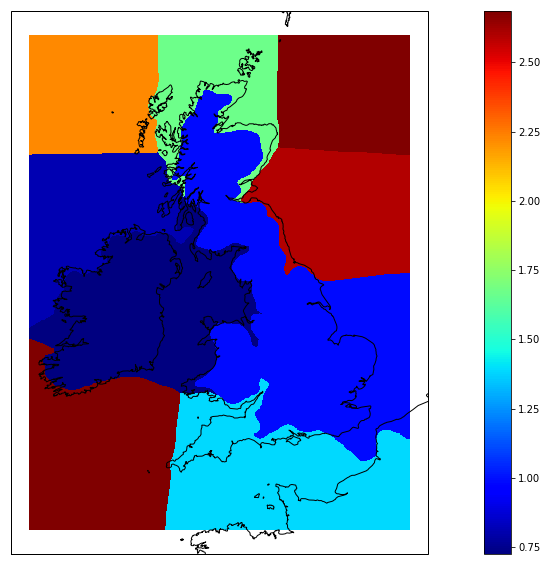

In [23]:
rotation = data_set['rotated_latitude_longitude']
transform=ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude,pole_latitude=rotation.grid_north_pole_latitude)
projection = transform

fig = plt.figure(figsize=(20,10))
#create an axis instance:
ax = fig.add_subplot(111,projection=projection)
pcm = ax.pcolormesh(data_set['grid_longitude'],data_set['grid_latitude'],All_STD_Vals,transform=transform,cmap='jet')
ax.coastlines(resolution='10m')
#ax.colorbar()
colbar = fig.colorbar(pcm)
#ax.imshow(mark_boundaries(image, segments))
#colbar.set_label("VAR("  + str(variable_name) + ")")

#plt.savefig("Var_in" + str(variable_name) + " (Kelvin)", bbox_inches='tight' ) 
plt.show()

In [ ]:
def Get_Super_Pixel_STDs(variable,segments) : 

    """
    
    Given a segmentation into superpixels we compute the variance
    in a given variable across ensemble members for each superpixel.
    
    We then return the variance across the
    
    
    
    """

    #variable = 'air_temperature'


    STD_Vals = [ ]
    Variance_Vals = [ ]

    for PIXEL in range(np.max(segments)):

        #Loop over ensembles within a superpixel: 
        num_ensemble_members = 12   
        Averages_in_this_pixel = [ ]

        print("Pixel = " + str(PIXEL))

        for i in range(num_ensemble_members) : 
            f = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk',2013,2,1,3,i,3),data_folder=Path('.')  )
            data_set = netCDF4.Dataset(f)
            #print(data_set.variables.keys() ) 
            #print(data_set.variables[variable][0][0])
            #average_for_this_ensemble_member_in_this_super_pixel = np.mean( data_set.variables[variable][0][0].data[segments==PIXEL] ) 
            
            #Different number of zeros for different variables:
            try : 
                average_for_this_ensemble_member_in_this_super_pixel = np.mean( data_set.variables[variable][0].data[segments==PIXEL] )
            except : 
                average_for_this_ensemble_member_in_this_super_pixel = np.mean( data_set.variables[variable][0][0].data[segments==PIXEL] )
            
            Averages_in_this_pixel.append(average_for_this_ensemble_member_in_this_super_pixel)

        #compute the varaiance for this superpixel:

        Variance_for_this_pixel = np.var(Averages_in_this_pixel)
        STD_for_this_pixel = np.std(Averages_in_this_pixel)
        STD_Vals.append(STD_for_this_pixel)
        Variance_Vals.append(Variance_for_this_pixel)
        
    return STD_Vals ,Variance_Vals 




STD_Vals ,Variance_Vals  = Get_Super_Pixel_STDs('air_temperature',segments)